<style>
    .title_container {
        margin: auto;
        background: rgb(81,92,103);
        background: linear-gradient(90deg, rgba(81,92,103,1) 36%, rgba(12,35,66,1) 62%);
        border-radius: 7px;
        color: white;
        text-align:center;
        width:75%;
        padding-top:2%;
        padding-bottom:2%;
    }
    
    .question_container {
        margin: auto;
        background: rgb(84,138,142);
        background: linear-gradient(90deg, rgba(84,138,142,1) 41%, rgba(145,201,73,1) 81%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .question_container p {
        font-size: 16px;
    }
    
    .alert_container {
        margin: auto;
        background: rgb(142,94,84);
        background: linear-gradient(128deg, rgba(142,94,84,1) 13%, rgba(201,103,73,1) 69%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .alert_container p {
        font-size: 16px;
    }
    
    .code_span {
        background-color: #E2E7EC;
        padding:2px;
        border-radius:1px;
        font-family: Consolas,monaco,monospace;
        color:black;
    }
</style>

<div class ='title_container'>
    <h1> Análisis de Datos II </h1>
    <h2> Profesor: Oldemar Rodríguez </h2>
    <h3> Estudiante: Jimmy Calvo Monge </h3>
    <h3> Carné: B31281 </h3>
    <hr style='color:white; width:80%;'>
    <h4> TAREA 12 </h4>
    <h4> Fecha de entrega: 20 de Noviembre de 2022 </h4>
</div>

Importamos los módulos necesarios para resolver esta tarea.

In [1]:
### Basicos
import numpy as np
import pandas as pd
from pandas import DataFrame
import math

### Utilidades/Varios
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Circle
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
import time
import graphviz
import os
import itertools
from tqdm import tqdm
import time

### Training/Testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### predictPy
from predictPy import Analisis_Predictivo

### Validacion Cruzada
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Modelos:
# MLPClassifier:
from sklearn.neural_network import MLPClassifier

### Clase MatConf de la Tarea 2
class MatConf:
    
    def __init__(self,matriz):
        
        self.mat_conf = matriz
        
        VN = self.mat_conf[0,0]
        VP = self.mat_conf[1,1]
        FP = self.mat_conf[0,1]
        FN = self.mat_conf[1,0]
        
        dict_medidas = {
            'Precisión Global' : (VN+VP)/(VN+FP+FN+VP),
            'Error Global' : (FN+FP)/(VN+FP+FN+VP),
            'Precisión Positiva (PP)' : VP/(FN+VP),
            'Precisión Negativa (PN)' : VN/(VN+FP),
            'Proporción de Falsos Positivos (PFP)' : FP/(VN+FP),
            'Proporción de Falsos Negativos (PFN)' : FN/(FN+VP),
            'Asertividad Positiva (AP)' : VP/(FP+VP),
            'Asertividad Negativa (AN)' : VN/(VN+FN)
        }
        self.dict_medidas = dict_medidas
        
    def __str__(self):
        mensaje="Estos son los resultados para esta matriz de confusion:"
        for key in list(self.dict_medidas.keys()):
            mensaje = mensaje + f"\n - {key}: {self.dict_medidas[key]}"
        return mensaje

import warnings
warnings.filterwarnings('ignore')

<div class='question_container'>
    <h2> Pregunta 1 </h2>
    <p> La tabla de datos <code>novatosNBA.csv</code> contiene diferentes métricas de desempeño de novatos de la NBA en su primera temporada. Para esta tabla, las 21 primeras columnas corresponden a las variables predictoras y la variable <code>Permanencia</code> es la variable a predecir, la cual indica si el jugador permanece en la NBA luego de 5 años. La tabla contiene 1340 filas (individuos) y 21 columnas (variables), con la tabla realice lo siguiente: </p>
    <ul>
    <li> Usando el paquete <code>MLPClassifier</code> en <code>Python</code> genere modelos predictivos usando un 75% de los datos para tabla aprendizaje y un 25% para la tabla testing. Genere al menos 2 modelos con configuraciones diferentes en los parámetros vistos en clase (<code>hidden_layer_sizes</code>, <code>activation</code>, <code>solver</code>). Realice lo anterior sin estandarizar los datos y luego con los datos estandarizados, es decir, al menos 4 modelos. Para estandarizar los datos utilice la clase <code>StandardScaler</code> de <code>sklearn.preprocessing</code> </li>
    <li> Para cada modelo obtenga los índices de precisión, compare e interprete los resultados y
las diferencias entre los modelos con datos estandarizados y los que no. </li>
    </ul>
</div>

In [2]:
datos_novatos = pd.read_csv("novatosNBA.csv",sep=";",index_col=0)
datos_novatos.head(5)

,PartidosJugados,MinutosJugados,PuntosPorJuego,PuntosCampoAnotados,PuntosCampoIntentados,PuntosCampoPorcentaje,Puntos3Anotados,Puntos3Intentados,Puntos3Porcentaje,TirosLibresRealizados,TirosLibresIntentados,TirosLibresPorcentaje,RebotesOfensivos,RebotesDefensivos,Rebotes,Asistencias,Robos,Bloqueos,PerdidaBalon,Permanencia
Nombre,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
### Hay datos faltantes:
nas_dict={}
for col in datos_novatos.columns:
    nas_dict[col]=datos_novatos[col].isna().sum()
nas_dict

{'PartidosJugados': 0,
 'MinutosJugados': 0,
 'PuntosPorJuego': 0,
 'PuntosCampoAnotados': 0,
 'PuntosCampoIntentados': 0,
 'PuntosCampoPorcentaje': 0,
 'Puntos3Anotados': 0,
 'Puntos3Intentados': 0,
 'Puntos3Porcentaje': 11,
 'TirosLibresRealizados': 0,
 'TirosLibresIntentados': 0,
 'TirosLibresPorcentaje': 0,
 'RebotesOfensivos': 0,
 'RebotesDefensivos': 0,
 'Rebotes': 0,
 'Asistencias': 0,
 'Robos': 0,
 'Bloqueos': 0,
 'PerdidaBalon': 0,
 'Permanencia': 0}

In [4]:
datos_novatos = datos_novatos.dropna() ### Eliminamos los fatos faltantes por ahora.

In [5]:
X = datos_novatos.drop(['Permanencia'],axis=1)
y = datos_novatos['Permanencia']

Estandarizamos los datos para estos dos primeros modelos.

In [9]:
datos_novatos_std = datos_novatos.copy()
datos_novatos_std.iloc[:,0:19] = StandardScaler().fit_transform(datos_novatos_std.iloc[:,0:19])
datos_novatos_std.head(5)

,PartidosJugados,MinutosJugados,PuntosPorJuego,PuntosCampoAnotados,PuntosCampoIntentados,PuntosCampoPorcentaje,Puntos3Anotados,Puntos3Intentados,Puntos3Porcentaje,TirosLibresRealizados,TirosLibresIntentados,TirosLibresPorcentaje,RebotesOfensivos,RebotesDefensivos,Rebotes,Asistencias,Robos,Bloqueos,PerdidaBalon,Permanencia
Nombre,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,-1.396466,1.171517,0.132867,-0.020616,0.471865,-1.539520,0.651138,1.235944,0.355367,0.300531,0.356433,-0.048365,-0.394923,1.012191,0.519775,0.231411,-0.537044,0.079043,0.143591,0
Andrew Harrison,-1.453692,1.111452,0.087038,-0.376442,0.221689,-2.373236,1.171343,1.894176,0.261716,1.311686,1.185898,0.581052,-0.651701,-0.015746,-0.304835,1.452906,1.168699,0.312485,0.557843,0
JaKarr Sampson,0.778130,-0.282057,-0.371255,-0.376442,-0.334258,-0.313466,0.391035,0.859812,0.317907,-0.407277,-0.397626,-0.324927,-0.651701,-0.236018,-0.401848,-0.379336,-0.293367,-0.154398,-0.270661,0
Malik Sealy,-0.137489,-0.726539,-0.256682,-0.198529,-0.111880,-0.248077,-0.389273,-0.268585,0.205525,-0.407277,-0.397626,-0.143731,-0.009757,-0.823410,-0.547367,-0.515058,-0.049689,-0.621281,-0.270661,1
Matt Geiger,-0.709751,-0.738552,-0.531657,-0.613660,-0.806813,1.353966,-0.649376,-0.644718,-1.205486,-0.002815,0.054810,-0.286780,-0.009757,-0.382866,-0.256329,-0.854362,-0.780722,0.079043,-0.546829,1


In [23]:
datos_novatos.head(5)

,PartidosJugados,MinutosJugados,PuntosPorJuego,PuntosCampoAnotados,PuntosCampoIntentados,PuntosCampoPorcentaje,Puntos3Anotados,Puntos3Intentados,Puntos3Porcentaje,TirosLibresRealizados,TirosLibresIntentados,TirosLibresPorcentaje,RebotesOfensivos,RebotesDefensivos,Rebotes,Asistencias,Robos,Bloqueos,PerdidaBalon,Permanencia
Nombre,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [28]:
nnet1 = MLPClassifier(hidden_layer_sizes = (5,5,5),
                      activation = "logistic",
                      solver = "sgd",
                      random_state = 0)

nnet2 = MLPClassifier(hidden_layer_sizes = (50,25,15,10,5),
                      activation = "tanh",
                      solver = "lbfgs",
                      random_state = 0)

### 2 modelos con datos estandarizados.

analisis_1_std = Analisis_Predictivo(datos_novatos_std,
                                 predecir = "Permanencia",
                                 modelo = nnet1, 
                                 train_size = 0.7,
                                 random_state = 0)

analisis_2_std = Analisis_Predictivo(datos_novatos_std,
                                 predecir = "Permanencia",
                                 modelo = nnet2, 
                                 train_size = 0.7,
                                 random_state = 0)

resultados_1 = analisis_1_std.fit_predict_resultados(imprimir = False)

resultados_2 = analisis_2_std.fit_predict_resultados(imprimir = False)

Ahora, hacemos lo mismo con los datos sin estandarizar.

In [29]:
nnet3 = MLPClassifier(hidden_layer_sizes = (5,5,5),
                      activation = "logistic",
                      solver = "sgd",
                      random_state = 0)

nnet4 = MLPClassifier(hidden_layer_sizes = (50,25,15,10,5),
                      activation = "tanh",
                      solver = "lbfgs",
                      random_state = 0)

### 2 modelos con datos NO estandarizados.

analisis_3 = Analisis_Predictivo(datos_novatos,
                                 predecir = "Permanencia",
                                 modelo = nnet3, 
                                 train_size = 0.75,
                                 random_state = 0)

analisis_4 = Analisis_Predictivo(datos_novatos,
                                 predecir = "Permanencia",
                                 modelo = nnet4, 
                                 train_size = 0.75,
                                 random_state = 0)

resultados_3 = analisis_3.fit_predict_resultados(imprimir = False)

resultados_4 = analisis_4.fit_predict_resultados(imprimir = False)

In [30]:
comparacion_df = pd.DataFrame({})
resultados = [resultados_1, resultados_2, resultados_3, resultados_4]

for res in resultados:
    
    medidas = MatConf(res['Matriz de Confusión']).dict_medidas
    comp_res = pd.DataFrame({})

    for key in list(medidas.keys()):
        comp_res[key] = [medidas[key]]
    comparacion_df = comparacion_df.append(comp_res, ignore_index=True)

comparacion_df.index = ['Nnet 1 estandarizado', 'Nnet 2 estandarizado',
                       'Nnet 1 NO estandarizado', 'Nnet 2 NO estandarizado']
comparacion_df

,Precisión Global,Error Global,Precisión Positiva (PP),Precisión Negativa (PN),Proporción de Falsos Positivos (PFP),Proporción de Falsos Negativos (PFN),Asertividad Positiva (AP),Asertividad Negativa (AN)
Nnet 1 estandarizado,0.395990,0.604010,0.000000,1.000000,0.000000,1.000000,NaN,0.395990
Nnet 2 estandarizado,0.365915,0.634085,0.269710,0.512658,0.487342,0.730290,0.457746,0.315175
Nnet 1 NO estandarizado,0.384384,0.615616,0.000000,1.000000,0.000000,1.000000,NaN,0.384384
Nnet 2 NO estandarizado,0.336336,0.663664,0.170732,0.601562,0.398438,0.829268,0.406977,0.311741


En este caso, vemos que los modelos tienen un comportamiento similar, pero esto es quizá por una inapropiada escogencia de arquitecturas para nuestras redes neuronales. 
Sí podemos notar, sin embargo, que la precisión global es ligeramente mayor en los casos que utilizan los datos estandarizados, para cada modelo correspondiente. Lo cual era de esperar.

<div class='question_container'>
    <h2> Pregunta 2 </h2>
    <p>Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en determinadas medidas de diagnóstico incluidas en el conjunto de datos. El conjunto de datos tiene 390 filas y 16 columnas: </p>
    <ul>
        <li><code>X</code>: Id del paciente.</li>
        <li><code>colesterol</code>: Colesterol en mg/dL.</li>
        <li><code>glucosa</code>: Glucosa en mg/dL.</li>
        <li><code>hdl_col</code>: Lipoproteínas (colesterol bueno).</li>
        <li><code>prop_col_hdl</code>: Proporción del colesterol entre el hdl.</li>
        <li><code>edad</code>: Edad del paciente.</li>
        <li><code>genero</code>: Género del paciente.</li>
        <li><code>altura</code>: Altura en pulgadas del paciente.</li>
        <li><code>peso</code>: Peso en libras del paciente.</li>
        <li><code>IMC</code>: índice de masa corporal.</li>
        <li><code>ps_sistolica</code>: Presión arterial sistólica.</li>
        <li><code>ps_diastolica</code>: Presión arterial diastólica.</li>
        <li><code>cintura</code>: Longitud de la cintura en pulgadas.</li>
        <li><code>cadera</code>: Longitud de la cadera en pulgadas.</li>
        <li><code>prop_cin_cad</code>: Proporción de la longitud de la cintura entre la longitud de la cadera.</li>
        <li><code>diabetes</code>: Diagnóstico de la diabetes.</li>
    </ul>
    <p>Realice lo siguiente:</p>
    <ul>
    <li> Cargue en <code>Python</code> la tabla de datos <code>diabetes.csv</code>.</li>
    <li> Usando el paquete <code>MLPClassifier</code> en <code>Python</code> genere modelos predictivos usando un 75% de los datos para tabla aprendizaje y un 25% para la tabla testing. Genere al menos 2 modelos con configuraciones diferentes en los parámetros vistos en clase (<code>hidden_layer_sizes</code>, <code>activation</code>, <code>solver</code>). Realice lo anterior sin estandarizar los datos y luego con los datos estandarizados, es decir, al menos 4 modelos. Para estandarizar los datos utilice la clase <code>StandardScaler</code> de <code>sklearn.preprocessing</code> </li>
        <li>Para cada modelo obtenga los índices de precisión, compare e interprete los resultados y las diferencias entre los modelos con datos estandarizados y los que no.</li>
    </ul>
</div>

In [39]:
datos_diabetes = pd.read_csv("diabetes.csv",index_col=0)
datos_diabetes['genero'].value_counts()

female    228
male      162
Name: genero, dtype: int64

In [33]:
datos_diabetes.dtypes

colesterol         int64
glucosa            int64
hdl_chol           int64
prop_col_hdl     float64
edad               int64
genero            object
altura             int64
peso               int64
IMC              float64
ps_sistolica       int64
ps_diastolica      int64
cintura            int64
caderas            int64
prop_cin_cad     float64
diabetes          object
dtype: object

La variable `genero` es categórica, así que la convertiremos a dummy.

In [36]:
#Convertimos a Dummy algunas de las variables predictoras
datos_diabetes_dum = pd.get_dummies(datos_diabetes, columns=['genero'])
col_diat = datos_diabetes_dum.pop("diabetes")
datos_diabetes_dum.insert(15, "diabetes", col_diat )
datos_diabetes_dum.head(5)

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,genero_female,genero_male,diabetes
1,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0,No_diabetes
2,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0,No_diabetes
3,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,1,0,No_diabetes
4,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0,No_diabetes
5,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0,No_diabetes


In [46]:
datos_diabetes_dum_std = datos_diabetes_dum.copy()
datos_diabetes_dum_std.iloc[:,0:15] = StandardScaler().fit_transform(datos_diabetes_dum_std.iloc[:,0:15])
datos_diabetes_dum_std.head(5)

,colesterol,glucosa,hdl_chol,prop_col_hdl,edad,altura,peso,IMC,ps_sistolica,ps_diastolica,cintura,caderas,prop_cin_cad,genero_female,genero_male,diabetes
1,-0.319013,-0.564655,-0.073401,-0.360132,-1.692029,-1.265070,-1.447312,-0.951944,-0.838071,-0.985822,-1.020105,-0.882489,-0.565995,0.842927,-0.842927,No_diabetes
2,-1.372619,-0.527432,-0.536983,-0.533102,-1.692029,-1.520574,-1.050840,-0.360358,-1.276087,-1.875972,-0.846299,-0.528950,-0.702760,0.842927,-0.842927,No_diabetes
3,0.218998,-0.601879,0.216339,-0.302476,-1.631108,0.267951,0.237692,0.079539,-1.188484,-0.837464,0.370339,0.354899,0.117828,0.842927,-0.842927,No_diabetes
4,0.420753,-0.192418,1.143504,-0.763729,-1.631108,-0.498560,-1.571209,-1.391841,-0.662865,-1.430897,-1.193910,-0.705719,-1.249818,0.842927,-0.842927,No_diabetes
5,-0.969111,-0.304089,0.969660,-1.224982,-1.631108,1.034462,-0.902163,-1.300828,-0.662865,0.201045,-1.020105,-0.705719,-0.839524,0.842927,-0.842927,No_diabetes


Procedemos a hacer lo mismo que en el ejercicio anterior.

In [51]:
nnet1 = MLPClassifier(hidden_layer_sizes = (3,)*4, activation = "relu",
                      solver = "adam", random_state = 0)

nnet2 = MLPClassifier(hidden_layer_sizes = (100,50,30,10), activation = "identity",
                      solver = "lbfgs", random_state = 0)

### 2 modelos con datos estandarizados.
analisis_1 = Analisis_Predictivo(datos_diabetes_dum_std, predecir = "diabetes",
                                 modelo = nnet1, train_size = 0.75, random_state = 40)

analisis_2 = Analisis_Predictivo(datos_diabetes_dum_std, predecir = "diabetes",
                                 modelo = nnet2, train_size = 0.75, random_state = 40)

resultados_1 = analisis_1.fit_predict_resultados(imprimir = False)
resultados_2 = analisis_2.fit_predict_resultados(imprimir = False)

nnet3 = MLPClassifier(hidden_layer_sizes = (3,)*4, activation = "relu", 
                      solver = "adam", random_state = 0)

nnet4 = MLPClassifier(hidden_layer_sizes = (100,50,30,10), activation = "identity",
                      solver = "lbfgs", random_state = 0)


analisis_3 = Analisis_Predictivo(datos_diabetes_dum, predecir = "diabetes",
                                 modelo = nnet3, train_size = 0.75, random_state = 40)

analisis_4 = Analisis_Predictivo(datos_diabetes_dum, predecir = "diabetes",
                                 modelo = nnet4, train_size = 0.75, random_state = 40)

resultados_3 = analisis_3.fit_predict_resultados(imprimir = False)
resultados_4 = analisis_4.fit_predict_resultados(imprimir = False)

In [52]:
comparacion_df = pd.DataFrame({})
resultados = [resultados_1, resultados_2, resultados_3, resultados_4]

for res in resultados:
    
    medidas = MatConf(res['Matriz de Confusión']).dict_medidas
    comp_res = pd.DataFrame({})

    for key in list(medidas.keys()):
        comp_res[key] = [medidas[key]]
    comparacion_df = comparacion_df.append(comp_res, ignore_index=True)

comparacion_df.index = ['Nnet 1 estandarizado', 'Nnet 2 estandarizado',
                       'Nnet 1 NO estandarizado', 'Nnet 2 NO estandarizado']
comparacion_df

,Precisión Global,Error Global,Precisión Positiva (PP),Precisión Negativa (PN),Proporción de Falsos Positivos (PFP),Proporción de Falsos Negativos (PFN),Asertividad Positiva (AP),Asertividad Negativa (AN)
Nnet 1 estandarizado,0.857143,0.142857,0.921348,0.222222,0.777778,0.078652,0.921348,0.222222
Nnet 2 estandarizado,0.948980,0.051020,0.977528,0.666667,0.333333,0.022472,0.966667,0.750000
Nnet 1 NO estandarizado,0.091837,0.908163,0.000000,1.000000,0.000000,1.000000,NaN,0.091837
Nnet 2 NO estandarizado,0.908163,0.091837,1.000000,0.000000,1.000000,0.000000,0.908163,NaN


Observe que para esta selección particular de parámetros y arquitecturas tuvimos un comportamiento superior en con los datos estandarizados. Algún fenómeno sucedió con la segunda arquitectura en los datos no estandarizados. Posiblemente de naturaleza numérica al emplear el solver y la función de activación seleccionados.

<div class='question_container'>
    <h2> Pregunta 3 </h2>
    <p>En este ejercicio vamos a predecir números escritos a mano (Hand Written Digit Recognition), la tabla de aprendizaje está en el archivo `ZipDataTrainCod.csv` y la tabla de testing está en el archivo `ZipDataTestCod.csv`. En la figura siguiente se ilustran los datos: </p>
    <p> Los datos de este ejemplo vienen de los códigos postales escritos a mano en sobres del correo postal de EE.UU. Las imágenes son de 16 $\times$ 16 en escala de grises, cada pixel va de intensidad de -1 a 1 (de blanco a negro). Las imágenes se han normalizado para tener aproximadamente el mismo tamaño y orientación. La tarea consiste en predecir, a partir de la matriz de 16 $\times$ 16 de intensidades de cada pixel, la identidad de cada imagen (0, 1, ...,  9) de forma rápida y precisa. Si es lo suficientemente precisa, el algoritmo resultante se utiliza como parte de un procedimiento de selección automática para sobres. Este es un problema de clasificación para el cual la tasa de error debe mantenerse muy baja para evitar la mala dirección de correo. La columna 1 tiene la variable a predecir Número codificada como sigue: 0='cero'; 1='uno'; 2='dos'; 3='tres'; 4='cuatro'; 5='cinco';6='seis'; 7='siete'; 8='ocho' y 9='nueve', las demás columnas son las variables predictivas, además cada fila de la tabla representa un bloque 16 $\times$ 16 por lo que la matriz tiene 256 variables predictoras. </p>
    <ol>
        <li>Usando el paquete <code>MLPClassifier</code> en <code>Python</code> genere un modelo predictivo de redes neuronales para estos datos. Utilice los siguientes parámetros: <code>hidden_layer_sizes = (250,100,50,25)</code>, <code>max_iter = 50000</code>, <code>activation = 'relu'</code>, <code>solver = 'adam'</code>, <code>random_state=0</code>. Interprete los resultados. </li>
        <li>Genere un modelo de redes neuronales con los mismos parámetros del ítem anterior, pero esta vez reemplace cada bloque $4\times4$ de píxeles por su promedio. ¿Mejora la predicción? ¿Qué ventaja tiene estos datos respecto a los anteriores? Recuerde que cada bloque $16\times16$ está representado por una fila en las matrices de aprendizaje y testing. Despliegue la matriz de confusión resultante. La matriz de confusión obtenida debería ser igual o muy similar a ésta (ver enunciado). </li>
        <li>Repita el item anterior pero esta vez reemplace cada bloque $4\times 4$ de píxeles por el máximo. ¿Mejoran resultados respecto a usar el promedio de cada bloque?</li>
    </ol>
</div>

In [53]:
zipdata_train = pd.read_csv("ZipDataTrainCod.csv",sep=';')
zipdata_test = pd.read_csv("ZipDataTestCod.csv",sep=';')

In [54]:
X_train = zipdata_train.drop(['Numero'],axis=1)
y_train = zipdata_train['Numero']
X_test = zipdata_test.drop(['Numero'],axis=1)
y_test = zipdata_test['Numero']

Ajustamos ahora la red neuronal solicitada sobre estos datos. Por el momento, no vamos a estandarizar los datos, aunque sería posible hacerlo en este ejercicio.

In [68]:
nnet = MLPClassifier(
    hidden_layer_sizes = (250,100,50,25),
    max_iter = 50000,
    activation = 'relu',
    solver = 'adam', 
    random_state=0) #Parametros indicados en la tarea

nnet.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(250, 100, 50, 25), max_iter=50000,
              random_state=0)

Obtenemos nuestra matriz de confusión.

In [69]:
prediccion = nnet.predict(X_test)
mat_cfn = confusion_matrix(y_test, prediccion)
mat_cfn

array([[352,   0,   3,   2,   1,   0,   1,   0,   0,   0],
       [  3, 147,   0,   1,   3,   1,   0,   0,   5,   0],
       [  1,   2, 187,   2,   4,   0,   2,   0,   0,   2],
       [  3,   0,   2, 181,   0,   6,   1,   2,   3,   0],
       [  0,   1,   6,   0, 169,   0,   0,   1,   0,   0],
       [  4,   1,   3,   2,   1, 150,   0,   1,   4,   0],
       [  0,   1,   2,   3,   0,   1, 163,   0,   0,   0],
       [  0,   0,   7,   1,   2,   1,   0, 136,   0,   0],
       [  1,   9,   0,   3,   0,   4,   0,   0, 149,   0],
       [  0,   0,   4,   1,   1,   1,   3,   0,   1, 253]], dtype=int64)

Encontramos la precisión por cada dígito. Para esto reciclamos una función de la Tarea 3

In [80]:
def get_prec_multi(mat_cfn, labels):
    suma_total = sum(sum(mat_cfn))
    suma_diag = sum([mat_cfn[i,i] for i in range(mat_cfn.shape[0])])
    prec_global = suma_diag/suma_total
    err_global = 1- prec_global
    prec_digitos={} ### Creamos un diccionario con la precisión de cada dígito.
    prec_digitos['Precisión Global']=prec_global
    prec_digitos['Error Global']=err_global
    for i in range(mat_cfn.shape[0]):
        prec_este_digito = mat_cfn[i,i]/sum([mat_cfn[i,j] for j in range(mat_cfn.shape[0])])
        prec_digitos[f'Precisión "{labels[i]}"']= prec_este_digito
    return prec_digitos

In [81]:
labels_dig=['cero','cinco','cuatro','dos','nueve','ocho','seis','siete','tres','uno']
get_prec_multi(mat_cfn, labels_dig)

{'Precisión Global': 0.9402092675635276,
 'Error Global': 0.05979073243647237,
 'Precisión "cero"': 0.9805013927576601,
 'Precisión "cinco"': 0.91875,
 'Precisión "cuatro"': 0.935,
 'Precisión "dos"': 0.9141414141414141,
 'Precisión "nueve"': 0.9548022598870056,
 'Precisión "ocho"': 0.9036144578313253,
 'Precisión "seis"': 0.9588235294117647,
 'Precisión "siete"': 0.9251700680272109,
 'Precisión "tres"': 0.8975903614457831,
 'Precisión "uno"': 0.9583333333333334}

Tenemos precisiones altas para la mayoría de los dígitos acá.

Seguidamente, haremos algo similar pero haciendo bloques de $4 \times 4$. Para lograr esto usamos el mismo código empleado en la Tarea 3.

In [70]:
def hacer_bloques(data,p):
    
    data_dim = int(math.sqrt(data.shape[1]))
    
    if data_dim % p == 0:
        
        q = int(data_dim / p)
        data_blocked = {}
        for i in range(q):
            for j in range(q):
                data_blocked[f'V{i}_{j}']=[]
        data_blocked = pd.DataFrame({})
        
        for r in range(data.shape[0]):
            ### Hacer un bloque de cada fila ###
            fila=data.iloc[r].tolist()
            x = np.array(fila)
            x = x.reshape(data_dim, data_dim)
            data_blocked_fila={}
            for i in range(q):
                for j in range(q):
                    
                    bloque=[]
                    for k in range(p):
                        bloque.append(x[p*i+k][p*j:p*(j+1)])
                    bloque=np.array([bloque])
                    
                    mean_bloque = np.mean(bloque)
                    data_blocked_fila[f'V_{i}_{j}']=[mean_bloque]
                    
            data_blocked_fila = pd.DataFrame(data_blocked_fila)
            data_blocked = data_blocked.append(data_blocked_fila, ignore_index=True)
                
        return data_blocked
    else:
        raise Exception("No se pueden hacer bloques de este tamaño")

In [71]:
data_bloques=hacer_bloques(data = X_train, p = 4)
data_bloques.head()

,V_0_0,V_0_1,V_0_2,V_0_3,V_1_0,V_1_1,V_1_2,V_1_3,V_2_0,V_2_1,V_2_2,V_2_3,V_3_0,V_3_1,V_3_2,V_3_3
0,-1.000000,-0.474625,-0.375938,-1.000000,-0.821562,0.193125,-0.717812,-0.804563,-0.008250,-0.009563,0.027188,-0.051063,-0.576125,0.692063,0.627938,-0.785875
1,-0.859687,0.531687,0.310500,-0.038937,-0.833000,0.475688,0.214625,-0.871188,-0.000250,-0.895750,-0.811813,0.244750,-0.182938,0.228562,0.386750,0.313188
2,-1.000000,-0.987500,-0.138437,-0.937500,-0.733625,-0.354875,0.047500,-0.998563,-0.616125,0.111375,0.332375,-0.601938,-1.000000,-0.900687,0.170062,-1.000000
3,-0.869625,0.109812,0.074312,-0.647687,-0.667375,-0.701563,-0.093875,-0.848375,-1.000000,-0.911438,-0.075313,-1.000000,-1.000000,-0.403062,-0.557000,-1.000000
4,-1.000000,0.025062,0.063688,-1.000000,-1.000000,-0.238063,0.320750,-0.984812,-0.895563,-0.882188,-0.735688,-0.188812,-0.203000,0.169000,0.037375,-0.145812


In [67]:
X_train_p4 = hacer_bloques(data = X_train, p = 4)
X_test_p4 = hacer_bloques(data = X_test, p = 4)
y_train_p4 = zipdata_train['Numero']
y_test_p4 = zipdata_test['Numero']

Aqui no utilizaré datos estandarizados.

In [73]:
nnet_p4 = MLPClassifier(
    hidden_layer_sizes = (250,100,50,25),
    max_iter = 50000,
    activation = 'relu',
    solver = 'adam', 
    random_state=0) #Parametros indicados en la tarea

nnet_p4.fit(X_train_p4.values, y_train_p4)
prediccion_p4 = nnet_p4.predict(X_test_p4.values)

mat_cfn_p4 = confusion_matrix(y_test, prediccion_p4)
mat_cfn_p4

array([[343,   1,   1,   2,   0,   6,   2,   2,   0,   2],
       [  2, 145,   1,   0,   3,   2,   1,   0,   6,   0],
       [  0,   1, 179,   2,  12,   0,   4,   1,   0,   1],
       [  4,   5,   2, 175,   1,   5,   2,   1,   3,   0],
       [  0,   0,   3,   0, 170,   1,   0,   3,   0,   0],
       [  3,   2,   2,   1,   6, 145,   0,   0,   5,   2],
       [  8,   1,   2,   1,   0,   0, 157,   0,   0,   1],
       [  0,   0,   4,   1,   7,   1,   0, 131,   3,   0],
       [  3,  17,   0,   2,   2,   7,   0,   0, 134,   1],
       [  1,   1,   3,   1,   0,   5,   3,   2,   1, 247]], dtype=int64)

Esta es la matriz de confusión que obtenemos ahora con los datos agrupados en bloques de $4\times 4$. Tiene una precisión menor para varias clases.

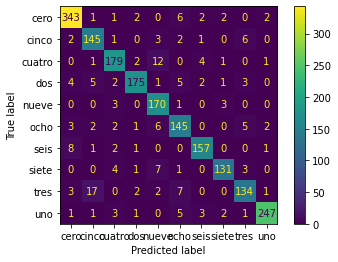

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nnet_p4, X_test_p4, y_test)

In [82]:
get_prec_multi(mat_cfn_p4, labels_dig)

{'Precisión Global': 0.9098156452416543,
 'Error Global': 0.09018435475834574,
 'Precisión "cero"': 0.9554317548746518,
 'Precisión "cinco"': 0.90625,
 'Precisión "cuatro"': 0.895,
 'Precisión "dos"': 0.8838383838383839,
 'Precisión "nueve"': 0.96045197740113,
 'Precisión "ocho"': 0.8734939759036144,
 'Precisión "seis"': 0.9235294117647059,
 'Precisión "siete"': 0.891156462585034,
 'Precisión "tres"': 0.8072289156626506,
 'Precisión "uno"': 0.9356060606060606}

En general vemos que las precisiones por dígito bajaron en este caso.

Ahora hacemos una agrupación por bloques, pero utilizando el máximo en cada bloque, veamos lo que sucede con la matriz de confusión.

In [85]:
def hacer_bloques_max(data,p):
    
    data_dim = int(math.sqrt(data.shape[1]))
    
    if data_dim % p == 0:
        
        q = int(data_dim / p)
        data_blocked = {}
        for i in range(q):
            for j in range(q):
                data_blocked[f'V{i}_{j}']=[]
        data_blocked = pd.DataFrame({})
        
        for r in range(data.shape[0]):
            ### Hacer un bloque de cada fila ###
            fila=data.iloc[r].tolist()
            x = np.array(fila)
            x = x.reshape(data_dim, data_dim)
            data_blocked_fila={}
            for i in range(q):
                for j in range(q):
                    
                    bloque=[]
                    for k in range(p):
                        bloque.append(x[p*i+k][p*j:p*(j+1)])
                    bloque=np.array([bloque])
                    
                    mean_bloque = np.max(bloque)  ### AQUI CAMBIAMOS A USAR EL MAXIMO !!
                    data_blocked_fila[f'V_{i}_{j}']=[mean_bloque]
                    
            data_blocked_fila = pd.DataFrame(data_blocked_fila)
            data_blocked = data_blocked.append(data_blocked_fila, ignore_index=True)
                
        return data_blocked
    else:
        raise Exception("No se pueden hacer bloques de este tamaño")

In [78]:
X_train_p4m = hacer_bloques_max(data = X_train, p = 4)
X_test_p4m = hacer_bloques_max(data = X_test, p = 4)
y_train_p4m = zipdata_train['Numero']
y_test_p4m = zipdata_test['Numero']

In [79]:
nnet_p4m = MLPClassifier(
    hidden_layer_sizes = (250,100,50,25),
    max_iter = 50000,
    activation = 'relu',
    solver = 'adam', 
    random_state=0) #Parametros indicados en la tarea

nnet_p4m.fit(X_train_p4m.values, y_train_p4m)
prediccion_p4m = nnet_p4m.predict(X_test_p4m.values)

mat_cfn_p4m = confusion_matrix(y_test, prediccion_p4m)
mat_cfn_p4m

array([[316,   1,   0,  10,   1,   8,  15,   0,   1,   7],
       [  5, 120,   2,   4,   3,   3,   4,   0,  17,   2],
       [  2,   1, 163,   5,  20,   0,   3,   2,   1,   3],
       [  9,   3,   1, 171,   1,   2,   1,   1,   5,   4],
       [  0,   0,  20,   1, 136,   4,   0,   9,   1,   6],
       [ 11,   8,   4,   4,   6,  95,   4,   1,   8,  25],
       [ 15,   1,   0,   4,   0,   0, 147,   0,   3,   0],
       [  0,   0,   9,   0,  15,   4,   0, 115,   1,   3],
       [  8,  17,   2,   9,   2,   5,   1,   4, 116,   2],
       [  0,   1,   6,   2,   0,   3,   5,   5,   0, 242]], dtype=int64)

In [84]:
get_prec_multi(mat_cfn_p4m, labels_dig)

{'Precisión Global': 0.807673143996014,
 'Error Global': 0.19232685600398602,
 'Precisión "cero"': 0.8802228412256268,
 'Precisión "cinco"': 0.75,
 'Precisión "cuatro"': 0.815,
 'Precisión "dos"': 0.8636363636363636,
 'Precisión "nueve"': 0.768361581920904,
 'Precisión "ocho"': 0.572289156626506,
 'Precisión "seis"': 0.8647058823529412,
 'Precisión "siete"': 0.782312925170068,
 'Precisión "tres"': 0.6987951807228916,
 'Precisión "uno"': 0.9166666666666666}

Aquí podemos observar que la agrupación en bloques de $4 \times 4$ tomando el máximo, en realidad bajó mucho más el desempeño del clasificador. Por eso nos quedamos con el original.

<div class='question_container'>
    <h2> Pregunta 4 </h2>
    <p> Represente en un grafo dirigido la Red Neuronal que tiene la siguiente entrada:</p>
    $$
    x = \begin{pmatrix}
    -2 \\
    1 \\
    1 \\
    3
    \end{pmatrix}.
    $$
    <p> Tiene las siguientes matrices de pesos </p>
    $$
    W_1 = \begin{pmatrix}
    1 & 2 & 0 & 4 \\
    5 & 3 & 1 & 2 \\
    2 & 3 & 0 & 2
    \end{pmatrix} \quad W_2 = \begin{pmatrix}
    4 & 2 & 3 \\
    1 & 3 & 6
    \end{pmatrix},
    $$
    tiene el siguiente bias:
    $$
    b = \begin{pmatrix}
    -6 \\
    -2
    \end{pmatrix}.
    $$
    Además use una función de activación tipo <strong> Tangente Hiperbólica </strong>, es decir:
    $$
    f(x) = \frac{2}{1+ e^{-2x}} + 1.
    $$
</div>

La imagen del grafo dirigido para esta red neuronal se encuentra adjunta en la entrega de la tarea como el archivo `Tarea12_Jimmy_Calvo_grafo_dirigido.png`. 

Justificación con cálculos.

In [93]:
primera_capa = np.matmul(
    np.array([ [1,2,0,4], [5,3,1,2], [2,3,0,2] ]),
    np.array([ [-2], [1], [1], [3] ])
)

segunda_capa = np.matmul(
    np.array([ [4,2,3], [1,3,6] ]),
    primera_capa
) + np.array([ [-6], [-2] ])

print(primera_capa)
print(segunda_capa)

[[12]
 [ 0]
 [ 5]]
[[57]
 [40]]


In [100]:
2/(1+math.exp(-1*57)) + 1.0

3.0

In [99]:
2/(1+math.exp(-1*40)) + 1.0

3.0

<div class='question_container'>
    <h2> Pregunta 5 </h2>
    <p> [no usar <code>MLPClassifier</code>] Para la Tabla de Datos que se muestra seguidamente donde $x^j$ para $j = 1, 2, 3$ son las variables predictoras y la variable a predecir es $z$. Diseñe y programe a pie una Red Neuronal de una capa (Perceptron):</p>
    <table style = "width:20%;">
        <thead>
        <tr>
            <th> $x^1$ </th>
            <th> $x^2$ </th>
            <th> $x^3$ </th>
            <th> $z$ </th>
         </tr>
        </thead>
        <tbody>
        <tr>
            <td> 1 </td>
            <td> 0 </td>
            <td> 0 </td>
            <td> 1 </td>
         </tr>
            <tr>
            <td> 1 </td>
            <td> 0 </td>
            <td> 1 </td>
            <td> 1 </td>
         </tr>
            <tr>
            <td> 1 </td>
            <td> 1 </td>
            <td> 0 </td>
            <td> 0 </td>
         </tr>
            <tr>
            <td> 1 </td>
            <td> 1 </td>
            <td> 1 </td>
            <td> 0 </td>
         </tr>
        </tbody>
    </table>
    <p> Es decir, encuentre todos los posibles pesos $w_1, w_2, w_3$ y umbrales $\theta$ para la Red Neuronal que se muestra en el siguiente gráfico (ver enunciado de la tarea).</p>
    <p> Use una función de activación tipo <strong>Sigmoidea</strong>, es decir:</p>
    $$
    f(x) = \frac{1}{1 + e^{-x}}.
    $$
    <p> Para esto escriba una Clase en <code>Python</code> que incluya los métodos necesarios pra implementar esta Red Neuronal. </p>
    <p> Se deben hacer variar los pesos $w_j$ con $j = 1,2,3$ en los siguientes valores $v=(-1,-0.9,-0.8,...,0,...,0.8,0.9,1)$ y haga variar $\theta$ en $u=(0,0.1,...,0.8,0.9,1)$. Escoja los pesos $w_j$ con $j = 1, 2, 3$ y el umbral $\theta$ de manera que se minimiza el error cuadrático medio: </p>
    $$
        E(w_1,w_2,w_3) = \frac{1}{4}\sum_{i=1}^4 \left[ I \left[ f\left( \sum_{j=1}^3 w_j\cdot x_i^j - \theta \right)\right] - z_i\right]^2
    $$
    <p> donde $x_i^j$ es la entrada en la fila $i$ de la variable $x^j$ e $I(t)$ se define como sigue:</p>
    $$
        I(t) = \begin{cases}
        1 & \text{ si } t \geq \frac{1}{2} \\
        0 & \text{ si } t < \frac{1}{2} \\
        \end{cases}
    $$
</div>

**Respuesta** Nuestra matriz tomará una matriz de tamaño $m \times n$ y un vector de respuestas $z$ para calcular este Perceptrón.

In [76]:
class Perceptron:
    
    def __init__(self, X, z):
        
        self.X = X
        self.z = y
        self.m = X.shape[0]
        self.n = X.shape[1]
        
    def f(self,x):
        return 1/(1+math.exp(-1*x))
        
    def I(self,t):
        
        if t < 0.5:
            return 0
        else:
            return 1

    def evaluar_MSE(self, w, theta):
        
        MSE = 0
        
        for i in range(self.m):
            
            eval_pt = sum([w[j]*self.X[i,j] for j in range(len(w))]) - theta
            eval_val = self.f(eval_pt)
            MSE = MSE + (self.I(eval_val) - self.z[i])**2
        
        return MSE
    
    def encontrar_arquitectura(self):
        
        valores = pd.DataFrame({})
        
        ### Aquí creamos todas las combinaciones posibles para los valores de theta y los pesos w.
        v = [round(vt, 1) for vt in np.linspace(-1,1,21)]
        u = [round(ut, 1) for ut in np.linspace(0,1,11)]
        combs = [v]*self.n
        combs.append(u)
        all_combs = list(itertools.product(*combs))
        
        start = time.time()
        
        for combo in tqdm(all_combs):
            # Para cada combinacion, evaluamos el MSE, todo quedará en un dataframe.
            MSE_tupla = self.evaluar_MSE(w = combo[0:self.n], theta = combo[-1])
            valores_tupla = pd.DataFrame({
                'MSE': [MSE_tupla],
                'theta': [combo[-1]]
            })
            for r in range(self.n):
                valores_tupla[f'w_{r+1}'] = [combo[r]]
            
            valores = valores.append(valores_tupla, ignore_index = True)
            
        end = time.time()
        print(f"Buscar las arquitecturas que minimizan el MSE duró {end - start} segundos.")
                           
        self.resultados_grid = valores
        
    def __str__(self):
        return f"""
        
        X: {self.X}
        x: {self.z}
        
        Mejores valores para los pesos y el bias:
        
        {self.resultados_grid.sort_values(by=['MSE']).head(5)}
        
        =========================================
        
        """

In [77]:
X = np.array([ [ 1, 0, 0] , [1, 0, 1], [1, 1, 0], [1, 1, 1] ])
z = np.array([1, 1, 0, 0])

mi_perceptron = Perceptron(X, z)
mi_perceptron.encontrar_arquitectura()
print(mi_perceptron.__str__())

100%|███████████████████████████████████████████████████████████████████████████| 101871/101871 [02:57<00:00, 575.27it/s]

Buscar las arquitecturas que minimizan el MSE duró 177.08615446090698 segundos.

        
        X: [[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
        x: [1 1 0 0]
        
        Mejores valores para los pesos y el bias:
        
               MSE  theta  w_1  w_2  w_3
97367    0    0.6  1.0 -0.9  0.0
87847    0    0.1  0.8 -0.8 -0.4
87848    0    0.2  0.8 -0.8 -0.4
87849    0    0.3  0.8 -0.8 -0.4
87850    0    0.4  0.8 -0.8 -0.4
        
        
        


In [78]:
# Si usamos la primera fila del resultado que vemos arriba.
mi_perceptron.evaluar_MSE(w = [1,-0.9, 0], theta=0.6)

0

Verificamos que obtuvimos el ajuste perfecto en este caso, porque obtuvimos un MSE de $0$. Para eso usamos la primera fila, que dió este MSE.

In [79]:
prediccion = []
for i in range(X.shape[0]):
    val = [X[i,j] for j in range(X.shape[1])]
    evval = 1*val[0] -0.9*val[1] + 0*val[2] - 0.6
    sigm = 1/(1+math.exp(-1*evval))
    if sigm < 0.5:
        prediccion.append(0)
    else:
        prediccion.append(1)
prediccion

[1, 1, 0, 0]

Es igual al $z$ dado en el ejercicio. Con esto pudimos encontrar una arquitectura que se ajusta a este vector.